# 모집단, 표본, 확률변수

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

구할 수 있는 또는 구해진 몇 개의 데이터만을 이용하여
전체 데이터에 대한 통계적 성질을 추측하는 추측통계의 기본 개념을 소개한다.

- 모집단과 표본
- 표본추출
- 확률분포
- 확률변수

## 모집단과 표본

모집단<font size='2'>population</font>은 통계적 성질을 알고자 하는 관측 대상들의 집단 전체를 가리킨다.
반면에 표본<font size='2'>sample</font>는 관측 대상 중에 실제로 측정 또는 관찰한 결과들의 집합이다.
표본추출<font size='2'>sampling</font>은 모집단에서 표본을 선택하는 과정이며,
이를 통해 얻어진 표본의 평균값, 분산 등이 (표본)통계량<font size='2'>statistic</font>이다. 

반면에 모집단에 대한 평균값과 분산인 모평균, 모분산 등의 모수<font size='2'>parameter</font>는 
파악하는 일은 일반적으로 매우 어렵거나 불가능하다. 
따라서 표본통계량을 이용하여 모수를 추정한다.
이런 의미에서표본평균, 표본분산 등을 모수에 대한 추정값으로 부른다.
아래 그림이 모집단, 표본, (표본)통계량, 모수의 관계를 잘 설명한다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch04/img-4-1.jpg?raw=true" style="width:600px"></div></p>

**모집단 예제: 캘리포니아 주택가격 데이터**

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**가구중위소득과 주택중위가격 활용**

In [8]:
housing = housing.loc[:, ['median_income', 'median_house_value']]

In [9]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


**산점도 확인**

<Axes: xlabel='median_income', ylabel='median_house_value'>

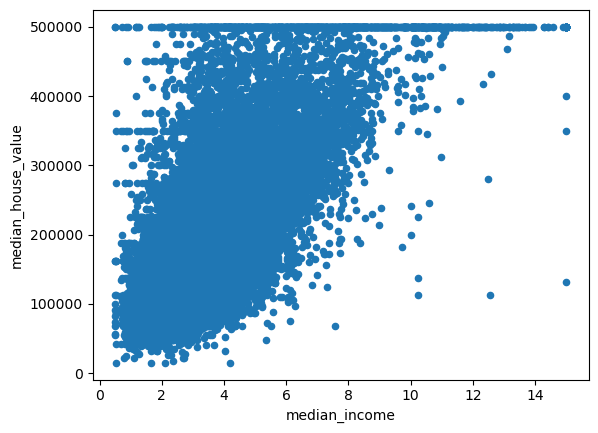

In [10]:
housing.plot.scatter('median_income', 'median_house_value')

주택중위가격이 500,000인 경우에 직선 형태의 산포도가 보이는데, 매우 부자연스럽다.
데이터 분포를 요약해서 확인해본다.

In [11]:
housing.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


500,001이 중위주택가격의 최댓값인데 자연스럽지 못하다. 
아마도 50만 달러 이상은 50만1 달러로 지정한 것으로 보인다.
따라서 이런 데이터는 부자연스러운 것으로 판단하여 제거해 본다.

**마스크와 부울 인덱싱**

주택중위가격이 50만 달러를 초과하는 경우 데이터에서 삭제하기 위해 부울 인덱싱을 활용한다.
먼저 주택중위가격이 50만 달러를 초과하는 경우에만 `True` 값을 갖는 1차원 어레이를
지정한다. 
이런 어레이를 마스크<font size='2'>mask</font>라고 부른다.

In [12]:
house_value_max = housing['median_house_value'].max()
house_value_max

500001.000000

In [13]:
mask = housing['median_house_value'] >= house_value_max
mask

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

총 965개의 `True`가 포함되어 있다.

In [14]:
mask.sum()

965

이제 50만 달러 이하의 경우만 남기기 위해 `mask`를 다음과 같이 이용한다.

In [15]:
housing = housing[~mask]

In [16]:
housing.shape

(19675, 2)

산점도를 다시 그리면 이전과 달라졌다.

<Axes: xlabel='median_income', ylabel='median_house_value'>

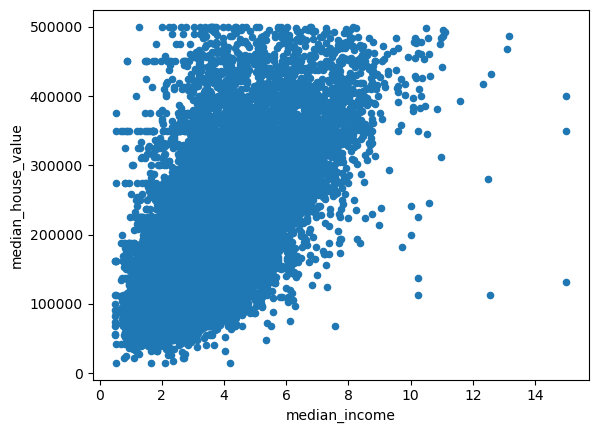

In [17]:
housing.plot.scatter('median_income', 'median_house_value')

## 표본추출

### 무작위 추출

전체 데이터의 1%를 무작위로 선택한다.

In [18]:
random_sampling = housing.sample(frac=0.01, random_state=1234)
random_sampling

,median_income,median_house_value
15905,1.9464,249000.0
13,2.6736,191300.0
12259,1.8845,77700.0
13028,3.0533,112100.0
17185,4.8405,354300.0
...,...,...
3152,2.6417,94900.0
14047,2.1094,162500.0
13420,5.0175,143400.0
15757,4.4450,400000.0


무작위로 선택된 1968개 샘플들의 기초 통계정보는 다음과 같다.

In [19]:
random_sampling.describe()

,median_income,median_house_value
count,197.000000,197.000000
mean,3.708061,193562.944162
std,1.482473,97703.602160
min,1.286400,22500.000000
25%,2.621700,122300.000000
50%,3.517900,168600.000000
75%,4.549300,247700.000000
max,8.495200,496400.000000


- 불편분산

In [20]:
random_sampling.var()

median_income         2.197727e+00
median_house_value    9.545994e+09
dtype: float64

- 표본분산(편향분산)

In [21]:
random_sampling.var(ddof=0)

median_income         2.186571e+00
median_house_value    9.497537e+09
dtype: float64

모집단 분포와 약간 차이가 있다.

In [22]:
housing.describe()

,median_income,median_house_value
count,19675.000000,19675.000000
mean,3.676717,192477.921017
std,1.570272,97711.509613
min,0.499900,14999.000000
25%,2.526800,116600.000000
50%,3.450000,173800.000000
75%,4.582600,248200.000000
max,15.000100,500000.000000


In [23]:
housing.var()

median_income         2.465753e+00
median_house_value    9.547539e+09
dtype: float64

In [24]:
housing.var(ddof=0)

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64

### 계층 샘플링

**소득 구간 지정**

주택가격은 소득과 밀접하게 연관된다.
그래서 소득별 구간을 지정한 다음에 구간별 샘플 수를 확인해볼 필요가 있다.

아래 코드는 소득을 5개 구간으로 쪼개면서 동시에 1부터 5의 정수를 구간 이름으로 지정하고,
이를 `housing` 데이터프레임에 특성으로 추가한다.

In [25]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [26]:
housing

,median_income,median_house_value,income_cat
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
20635,1.5603,78100.0,2
20636,2.5568,77100.0,2
20637,1.7000,92300.0,2
20638,1.8672,84700.0,2


소득구간을 기준으로 히스토그램을 그리면 다음과 같다.

Text(0, 0.5, 'Number of districts')

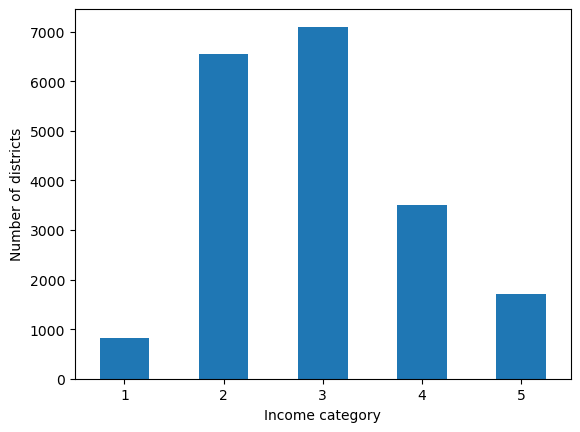

In [27]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=False)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

**소득 구간별 샘플 수**

- `groupby()` 메서드 활용

`groupby()` 메서드는 지정된 구간을 기준으로 데이터를 그룹화한다.

In [28]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)

생성된 `DataFrameGroupBy` 객체는 내부를 보여주지는 않는다.

In [29]:
stratification

그 대신 생성된 그룹별로 통계 관련 메서드를 적용할 수는 있다.
예를 들어 아래 코드는 그룹별 샘플 수를 계산한 결과를 데이터프레임으로 보여준다.

In [30]:
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


In [31]:
stratified_sum = stratification.sum()
stratified_sum

,median_income,median_house_value
income_cat,,
1,988.6214,8.816690e+07
2,15234.0468,8.840968e+08
3,26161.8582,1.377902e+09
4,17960.4249,8.714170e+08
5,11994.4543,5.654208e+08


In [32]:
stratified_cmean = stratification.mean()
stratified_cmean

,median_income,median_house_value
income_cat,,
1,1.214523,108313.143735
2,2.325099,134935.408730
3,3.683212,193988.680698
4,5.128619,248834.094803
5,7.038999,331819.718310


In [33]:
stratified_std = stratification.std()
stratified_std

,median_income,median_house_value
income_cat,,
1,0.233626,69314.530601
2,0.406648,69001.703453
3,0.426619,81583.050538
4,0.410023,80596.339192
5,1.070536,80536.125453


In [34]:
stratified_var = stratification.var()
stratified_var

,median_income,median_house_value
income_cat,,
1,0.054581,4.804504e+09
2,0.165363,4.761235e+09
3,0.182003,6.655794e+09
4,0.168119,6.495770e+09
5,1.146047,6.486068e+09


**계층 샘플링**

그룹별로 샘플링을 진행하려면 `apply()` 메서드를 이용한다.
아래 코드는 그룹별로 1%의 샘플을 무작위로 추출한다.

In [35]:
stratified_sampling = stratification.apply(lambda y:y.sample(frac=0.1, random_state=1234), include_groups=False)
stratified_sampling

median_income  median_house_value
income_cat                                         
1          15062         1.3291            120800.0
           17524         0.7068            200000.0
           5177          1.0375             89800.0
           8373          1.2094            157500.0
           5225          0.9889             87500.0
...                         ...                 ...
5          18255         6.2884            414700.0
           10317        10.1299            454300.0
           1511          7.6877            367700.0
           12369         6.1437            232100.0
           10524         6.9343            298500.0

[1966 rows x 2 columns]

아래 코드는 샘플링 결과를 소득구간 기준으로 그룹화를 진행한 다음에 각 구간별로 선택된 샘플의 개수를 확인한다.

In [36]:
stratified_sampling_count = stratified_sampling.groupby(level=0, observed=False).count()
stratified_sampling_count

,median_income,median_house_value
income_cat,,
1,81,81
2,655,655
3,710,710
4,350,350
5,170,170


In [37]:
stratified_sampling_count.sum()

median_income         1966
median_house_value    1966
dtype: int64

### 무작위 추출 vs. 계층 샘플링

구간 정보를 기억하면서 무작위 추출을 다시 진행한다.

In [38]:
random_sampling = housing.sample(frac=0.1, random_state=1234)
random_sampling

,median_income,median_house_value,income_cat
15905,1.9464,249000.0,2
13,2.6736,191300.0,2
12259,1.8845,77700.0,2
13028,3.0533,112100.0,3
17185,4.8405,354300.0,4
...,...,...,...
14830,2.0213,110600.0,2
18112,5.4842,335300.0,4
15836,4.2667,338800.0,3
6027,2.8983,129200.0,2


구간별 무작위 추출된 그룹의 크기를 확인한다.

In [39]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,76,76
2,668,668
3,691,691
4,353,353
5,180,180


총 1968개의 데이터가 무작위로 선택되었다.

In [40]:
random_sampling_count.sum()

median_income         1968
median_house_value    1968
dtype: int64

**오류율 비교표**

무작위 추출과 계층 샘플링의 결과를 비교해본다.
기준은 각 구간별 비율을 사용한다.

- 두 샘플링에 사용된 샘플 수

In [41]:
random_total = random_sampling_count.sum()
random_total

median_income         1968
median_house_value    1968
dtype: int64

In [42]:
stratified_total = stratified_sampling_count.sum()
stratified_total

median_income         1966
median_house_value    1966
dtype: int64

- 선택된 샘플 대비 그룹별 크기 비율

In [43]:
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.038618,0.038618
2,0.339431,0.339431
3,0.351118,0.351118
4,0.179370,0.179370
5,0.091463,0.091463


In [44]:
stratified_sampling_ratio = stratified_sampling_count / stratified_total
stratified_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.041200,0.041200
2,0.333164,0.333164
3,0.361139,0.361139
4,0.178026,0.178026
5,0.086470,0.086470


전체 데이터의 구간별 비율

In [45]:
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


In [46]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


In [47]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]], 
                         stratified_sampling_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:, [1]]],
                        axis=1)

proportions.columns = ['전체(%)', '계층 샘플링(%)', '무작위 추출(%)']
proportions.index.name = '소득 구간'
proportions

,전체(%),계층 샘플링(%),무작위 추출(%)
소득 구간,,,
1,0.041372,0.041200,0.038618
2,0.333011,0.333164,0.339431
3,0.361017,0.361139,0.351118
4,0.177992,0.178026,0.179370
5,0.086607,0.086470,0.091463


In [48]:
proportions["계층 샘플링 오류율(%)"] = (proportions["계층 샘플링(%)"] / proportions["전체(%)"] - 1)
proportions["무작위 추출 오류율(%)"] = (proportions["무작위 추출(%)"] / proportions["전체(%)"] - 1)

In [49]:
proportions

,전체(%),계층 샘플링(%),무작위 추출(%),계층 샘플링 오류율(%),무작위 추출 오류율(%)
소득 구간,,,,,
1,0.041372,0.041200,0.038618,-0.004155,-0.066576
2,0.333011,0.333164,0.339431,0.000457,0.019277
3,0.361017,0.361139,0.351118,0.000340,-0.027419
4,0.177992,0.178026,0.179370,0.000191,0.007739
5,0.086607,0.086470,0.091463,-0.001586,0.056070


In [50]:
proportions_percent = (proportions *100).round(2)
proportions_percent

,전체(%),계층 샘플링(%),무작위 추출(%),계층 샘플링 오류율(%),무작위 추출 오류율(%)
소득 구간,,,,,
1,4.14,4.12,3.86,-0.42,-6.66
2,33.30,33.32,33.94,0.05,1.93
3,36.10,36.11,35.11,0.03,-2.74
4,17.80,17.80,17.94,0.02,0.77
5,8.66,8.65,9.15,-0.16,5.61


**계층 샘플링 데이터만 활용**

In [51]:
stratified_sampling = stratified_sampling.reset_index(level=0, drop=True).sort_index()

In [52]:
stratified_sampling

,median_income,median_house_value
11,3.2705,241800.0
27,1.8080,105500.0
32,1.7969,110400.0
47,1.7348,137500.0
48,0.9506,187500.0
...,...,...
20589,1.6652,58900.0
20600,3.1029,71700.0
20610,1.3631,45500.0
20622,2.4167,67000.0


In [53]:
stratified_sampling.reset_index(drop=True, inplace=True)

In [54]:
stratified_sampling

,median_income,median_house_value
0,3.2705,241800.0
1,1.8080,105500.0
2,1.7969,110400.0
3,1.7348,137500.0
4,0.9506,187500.0
...,...,...
1961,1.6652,58900.0
1962,3.1029,71700.0
1963,1.3631,45500.0
1964,2.4167,67000.0


<Axes: xlabel='median_income', ylabel='median_house_value'>

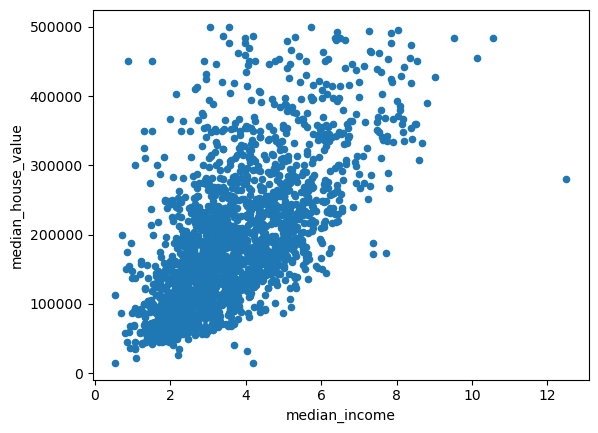

In [55]:
stratified_sampling.plot.scatter('median_income', 'median_house_value')

### 모평균 vs. 표본평균

In [56]:
housing.describe()

,median_income,median_house_value
count,19675.000000,19675.000000
mean,3.676717,192477.921017
std,1.570272,97711.509613
min,0.499900,14999.000000
25%,2.526800,116600.000000
50%,3.450000,173800.000000
75%,4.582600,248200.000000
max,15.000100,500000.000000


In [57]:
housing.iloc[:, :2].var()

median_income         2.465753e+00
median_house_value    9.547539e+09
dtype: float64

In [58]:
stratified_sampling.describe()

,median_income,median_house_value
count,1966.000000,1966.000000
mean,3.669090,194591.962360
std,1.557142,98903.683302
min,0.536000,14999.000000
25%,2.548650,122175.000000
50%,3.399750,178100.000000
75%,4.588850,246900.000000
max,12.500000,500000.000000


- 불편분산

In [59]:
stratified_sampling.var()

median_income         2.424690e+00
median_house_value    9.781939e+09
dtype: float64

- 표본분산(편향분산)

In [60]:
stratified_sampling.var(ddof=0)

median_income         2.423457e+00
median_house_value    9.776963e+09
dtype: float64

## 확률변수와 확률분포

모집단에서 임의로 표본을 선택하는 무작위 추출<font size='2'>random sampling</font> 방식의
결과는 미리 알 수 없다.
또한 무작위 추출을 실행할 때마다의 결과는 일반적으로 다르다. 
하지만 무작위 추출을 실행할 때 어떤 값이 나올 확률을 계산할 수 있는 경우가 있다.

예를 들어, 주사위를 던질 때 나오는 값은 1부터 6까지의 정수 중에서 무작위로 하나의 수를 선택하는
무작위 추출이다.
주사위를 던지면 어떤 값이 나올지는 모르지만 1부터 6까지의 정수 각각이 1/6의 확률로 나온다는
사실은 잘 알려져 있다.

**확률변수**

주사위를 던졌을 때 나올 수 있는 값을 가리키는 변수를 `X`라 하자.
`X`가 가리키는 값이 나올 확률은 정상적인 주사위인 경우 항상 1/6이다.
이처럼 무작위 추출을 수행할 때 어떤 값이 나올지를 미리 알 수는 없지만 
어떤 값이 나올 확률이 알려진 값을 가리키는 변수를
확률변수<font size='2'>random variable</font>라 부른다.

확률변수 `X`가 가리키는 값이 `k`이고 `n`이 나올 확률이 `p`일 때 다음과 같이 표기한다.

$$
P(X=k) = p
$$

주사위를 던졌을 때 나오는 값을 가리키는 확률변수 `X`가
1부터 6까지의 정수를 가리키는 확률이 동일하게 1/6이라는 
사실은 다음과 같이 표현된다.

$$
P(X=1) = P(X=2) = \cdots = P(X=6) = \frac1 6
$$

**확률분포**

확률분포는 확률변수가 가리킬 수 있는 값들의 확률들의 구조를 가리킨다.
예를 들어, 주사위를 던졌을 때 나오는 값을 가리키는 확률변수 `X`의 확률분포는 다음과 같다.

| `X` | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

확률변수 `X`의 확률분포가 알려졌을 때 '확률변수 `X`는 해당 확률분포를 따른다.'라고 말한다.
예를 들어 주사위를 던졌을 때 나오는 값을 가리키는 변수 `X`는 위 확률분포를 따른다.

### 무작위 추출과 확률분포

`housing` 데이터셋을 이용하여 확률분포와 무작위 추출의 관계를 설명한다.

변수 `X`가 소득범주를 가리키도록 했을 때, `X`는 아래 확률분포를 따르는 확률변수가 된다.

| `X` | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

이유는 앞서 계산한 소득구간별 샘플 크기의 비율이 다음과 같기 때문이다.

In [61]:
proportions

,전체(%),계층 샘플링(%),무작위 추출(%),계층 샘플링 오류율(%),무작위 추출 오류율(%)
소득 구간,,,,,
1,0.041372,0.041200,0.038618,-0.004155,-0.066576
2,0.333011,0.333164,0.339431,0.000457,0.019277
3,0.361017,0.361139,0.351118,0.000340,-0.027419
4,0.177992,0.178026,0.179370,0.000191,0.007739
5,0.086607,0.086470,0.091463,-0.001586,0.056070


위 결과는 19,674구역 중에 임의의 구역을 선택했을 때 해당 구역의 소득이
예를 들어 1구간에 속할 확률은 약 4% 정도이고, 3구간에 속할 확률은 약 33% 정도임을 의미한다.
그리고 실험으로 이를 입증할 수 있다.

모집단인 캘리포니아 주택가격 데이터셋의 1%를 무작위로 추출했을 때
각각의 소득구간에 속하는 샘플들의 비율은 아래 코드에서 확인되는 것처럼
거의 확률변수 `X`의  분포를 따른다.

In [62]:
proportions['무작위 추출(%)']

소득 구간
1    0.038618
2    0.339431
3    0.351118
4    0.179370
5    0.091463
Name: 무작위 추출(%), dtype: float64

이렇듯 무작위 추출과 확률분포는 밀접하게 연관된다.

## 확률변수 시행 모의실험

소득범주를 가리키는 확률변수 `X`의 시행을 모의실험<font size='2'>simulation</font>한다.
확률변수의 시행은 주사위를 던지는 것처럼 확률변수가 가리킬 수 있는 값을 무작위로 선택하는 과정을 가리킨다.

소득범주가 1부터 5까지의 정수를 가질 수 있기 때문에 
소득범주를 가리키는 확률변수 `X`의 시행은 1부터 5까지의 정수를 하나 무작위로 선택하는 것이다.
이를 모의실험하기 위해 `np.random.choice()` 함수를 이용한다.

예를 들어, 1부터 5까지의 정수 중에 하나를 무작위로 선택하는 방법은 다음과 같다.

In [63]:
np.random.choice(range(1, 6))

3

**균등분포**

그런데 `np.random.choice()` 함수는 기본적으로 균등분포<font size='2'>uniform distribution</font>다. 
즉, 위 코드를 반복 실행하면 1부터 5까지의 정수가 각각 1/5의 확률로 선택된다.
이또한 모의실험으로 확인할 수 있다.
아래 코드는 `np.random.choice()` 함수를 이용하여 1부터 5까지의 정수를 무작위로 1만 개 선택한다.

In [64]:
np.random.seed(17)

random_trial = 10000
sample = np.random.choice(range(1, 6), 10000)
sample.shape

(10000,)

아래 코드는 도수분포표를 작성한다.

In [65]:
freq, _ = np.histogram(sample, bins=5, range=(1, 6))
freq

array([1963, 2011, 1973, 2018, 2035])

1부터 5까지의 각 정수별 빈도와 비율을 데이터프레임으로 확인하면
각각의 정수가 모두 20% 정도씩 선택되었음이 확인된다.

In [66]:
income_cat_freq10000 = pd.DataFrame({'빈도': freq,
                                     '비율': freq/random_trial},
                                    index=range(1, 6))

income_cat_freq10000

,빈도,비율
1,1963,0.1963
2,2011,0.2011
3,1973,0.1973
4,2018,0.2018
5,2035,0.2035


**확률분포를 따르는 무작위 추출**

`np.random.choice()` 함수가 특정 확률분포를 따르도록 할 수 있다.
예를 들어 1부터 5까지의 정수를 앞서 확인한
캘리포니아 주택가격의 소득범주를 따르도록 하면서 무작위로 하나의 정수를 선택하게 하려면
다음과 같이 한다.

먼저 소득범주를 가리키는 확률변수 `X`의 확률분포를 아래와 같이 1차원 어레이로 지정한다.

In [67]:
prob_X = proportions['전체(%)'].values

이제 아래 코드는 1부터 5까지의 정수를 `X`의 확률분포를 따르면서 무작위로 정수를 선택한다.

In [68]:
np.random.seed(17)

np.random.choice(range(1, 6), p=prob_X)

2

이전과 유사하게 1만 개의 정수를 선택하도록 한다.

In [69]:
np.random.seed(17)

random_trial = 10000
sample = np.random.choice(range(1, 6), 10000, p=prob_X)
sample.shape

(10000,)

다시 한 번 도수분포표를 확인하면 다음과 같다.

In [70]:
freq, _ = np.histogram(sample, bins=5, range=(1, 6))

income_cat_freq10000 = pd.DataFrame({'빈도': freq,
                                     '비율': freq/random_trial},
                                    index=range(1, 6))

income_cat_freq10000

,빈도,비율
1,431,0.0431
2,3379,0.3379
3,3592,0.3592
4,1771,0.1771
5,827,0.0827


비율을 보면 `prob_X`와 매우 유사함이 확인된다.

In [71]:
prob_X

array([0.041372, 0.333011, 0.361017, 0.177992, 0.086607])

In [72]:
income_cat_freq10000['비율']

1    0.0431
2    0.3379
3    0.3592
4    0.1771
5    0.0827
Name: 비율, dtype: float64

위 결과를 히스토그램으로 확인한다.
아래 그림에서 5개의 빨간선은 `prob_X`의 구간별 비율을 표시한다.

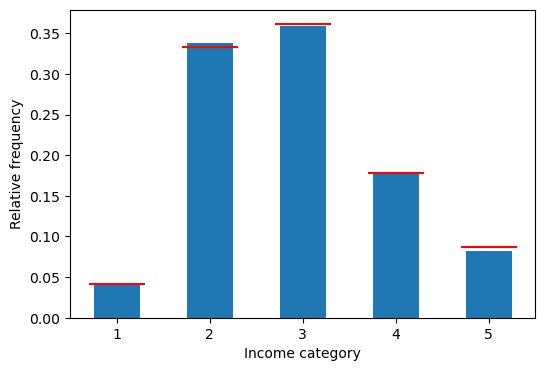

In [73]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

_ = income_cat_freq10000['비율'].plot.bar(ax=ax, rot=0)
ax.hlines(prob_X, np.arange(-0.3, 4), np.arange(0.3, 4.5), colors='red')
ax.set_xlabel('Income category')
ax.set_ylabel('Relative frequency')
plt.show()

**`plt.hist()` 함수 활용**

동일한 그림을 표본 데이터를 이용하여 그릴 수도 있다.
`plt.hist()` 함수를 호출할 때 `density=True`를 지정하면 빈도의 비율을 막대그래프 형식으로 그린다.

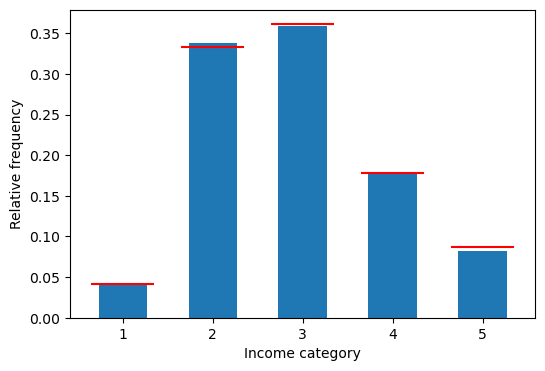

In [74]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

ax.hist(sample, bins=5, range=(1, 6), density=True, rwidth=0.54)
ax.hlines(prob_X, np.arange(1.15, 6), np.arange(1.85, 6), colors='red')

ax.set_xticks(np.linspace(1.5, 5.5, 5))
ax.set_xticklabels(np.arange(1, 6))
ax.set_xlabel('Income category')
ax.set_ylabel('Relative frequency')
plt.show()

## 표본평균의 분포

**무작위 추출 활용**

In [75]:
total_number = housing.shape[0]
total_number

19675

**1% 샘플링**

In [76]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling

,median_income,median_house_value,income_cat
5439,6.0804,420000.0,5
13059,3.1654,111600.0,3
6778,4.2944,354700.0,3
801,4.7083,190900.0,4
10383,3.4115,184800.0,3
...,...,...,...
16157,3.7036,369200.0,3
3817,5.2118,215800.0,4
19516,1.3036,75000.0,1
19020,4.4375,132600.0,3


In [77]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent, :2]
sampling.mean()

median_income              3.669164
median_house_value    189311.642095
dtype: float64

**샘플링 반복**

아래 코드는 무작위 추출을 5번 반복한다.

In [78]:
for i in range(5):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    print(f"{i+1}번째 샘플링:")
    print(sampling.mean())
    print()

1번째 샘플링:
median_income              3.670952
median_house_value    192423.538383
dtype: float64

2번째 샘플링:
median_income              3.685474
median_house_value    191303.050330
dtype: float64

3번째 샘플링:
median_income              3.697356
median_house_value    193386.120488
dtype: float64

4번째 샘플링:
median_income              3.694461
median_house_value    195169.903406
dtype: float64

5번째 샘플링:
median_income              3.649889
median_house_value    191354.651246
dtype: float64



아래 코드는 무작위 추출 10,000 반복하면서 표본평균을 모든다.

In [79]:
sampling_count = 10000

income_mean = np.zeros(sampling_count)

for i in range(sampling_count):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    income_mean[i] = sampling['median_income'].mean()

모아진 10,000개의 표본평균 자체로 새로운 분포를 가지며 표본평균의 평균값은 다음과 같다.

In [80]:
np.mean(income_mean)

3.676479

표본평균의 분산이 매우 작다.

In [81]:
np.var(income_mean)

0.001247

모집단의 평균값과 표본평균의 평균값이 매우 유사하다.

In [82]:
housing['median_income'].mean()

3.676717